## Examples of ''Taylor-Diffusion'' 


                A. Standard Map (Deterministic dynamics)  
                    
                B. Particle driven by an Ornstein Uhlenbeck Noise
                
                C. Particle driven by ''turbulent signal''

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
figheight=6

### Sources :

Boffetta et al , "Introduction to Chaos And diffusion", arXiv preprint, https://arxiv.org/pdf/nlin/0411023.pdf

Taylor 1921, "Diffusion by continuous movements", https://mhd.ens.fr/IHP09/Young/Biblio/Taylor1921.pdf

Bill Young, Lectures On Stirring and Mixing (Woods Hole, 1999), http://pordlabs.ucsd.edu/wryoung/GFD_Lect/GFD_Lectures.html

Sreenivasan,  2013, " GI Taylor: the inspiration behind the Cambridge school" in "Voyage through turbulence"


In [2]:
display(HTML("<table><tr>\
            <td><img src='./DATA_TaylorDiffusion/TaylorPic_FromSreeni.png'></td>\
            <td><img src='./DATA_TaylorDiffusion/Taylor_1921.png'></td>\
            </tr></table>"))

,


### A. Standard Map (Deterministic dynamics)  

Deterministic ODE with dynamics~:

$J(t + 1) = J(t) + K \sin θ(t)$

$θ(t + 1) = θ(t) + J(t + 1)$

Chaotic behaviour for $K \simeq 10.5$*

Random phase approximation predicts diffusive behaviour for $J$ with  $D = K^2 /4$.

In [3]:
#Parameters
K=np.random.rand(1)*100#
K=11.778
print(K)
#11.77848537, K= 72.01763644, K=86.92095701 are very good ! 
M=5000
N=5000

J,theta=np.zeros((N,M)),np.zeros((N,M))

J[0,:]=np.random.rand(M)*2*pi
theta[0,:]=np.random.rand(M)*2*pi
for t in range(N-1):
    J[t+1,:]=J[t,:]+K*np.sin(theta[t,:])
    theta[t+1,:]=theta[t,:]+ J[t+1,:]
def show_map():
    time=np.arange(N)
    fig,ax=subplots(2,2,figsize=(2*figheight,2*figheight))
    #ax[0].plot(time,theta.mean(axis=1),label='$\\theta$'); 
    #ax[0].plot(time,J.mean(axis=1)/np.sqrt(J.var(axis=1)),label='$J$');

    a=ax[0,0]
    a.plot(time[::30],np.sin(theta[::30,0:1]));
    a.plot(time,np.sin(theta).mean(axis=1),'k',label='average');

    a.set_ylabel('$\\sin(\\theta)$ (''velocity'')');  a.set_xlabel('t') ; a.legend()

    a=ax[0,1]
    a.plot(time[::20],J[::20,0:3]);
    a.plot(time,J.mean(axis=1),'k',label='average');
    a.set_ylabel('$J$ (''position'')');  a.set_xlabel('t') ; a.legend()

    a=ax[1,0]
    a.plot(time,J.var(axis=1),label='$J$');
    a.plot(time,(np.sin(theta)).var(axis=1),label='$ \\sin(\\theta)$');
    a.plot(time,0.5*K**2*time,'k--',label='$K^2t /2$');
    a.set_ylabel('variance');  a.set_xlabel('t') ; a.legend()

    a=ax[1,1] 
    pdf,bins=np.histogram((J[-1,:]-J[-1,:].mean())/np.sqrt(J[-1,:].var()),bins=40,density=True)
    bins=(bins[1:]+bins[:-1])*0.5
    a.plot(bins,pdf,label='Final Time')
    a.plot(bins,np.sqrt(1/(2*pi))*np.exp(-0.5*bins**2),'k--',label='Gaussian')
    a.set_yscale('log')
    a.set_ylabel('pdf ');  a.set_xlabel('J ') ; a.legend()
    return fig,ax

11.778


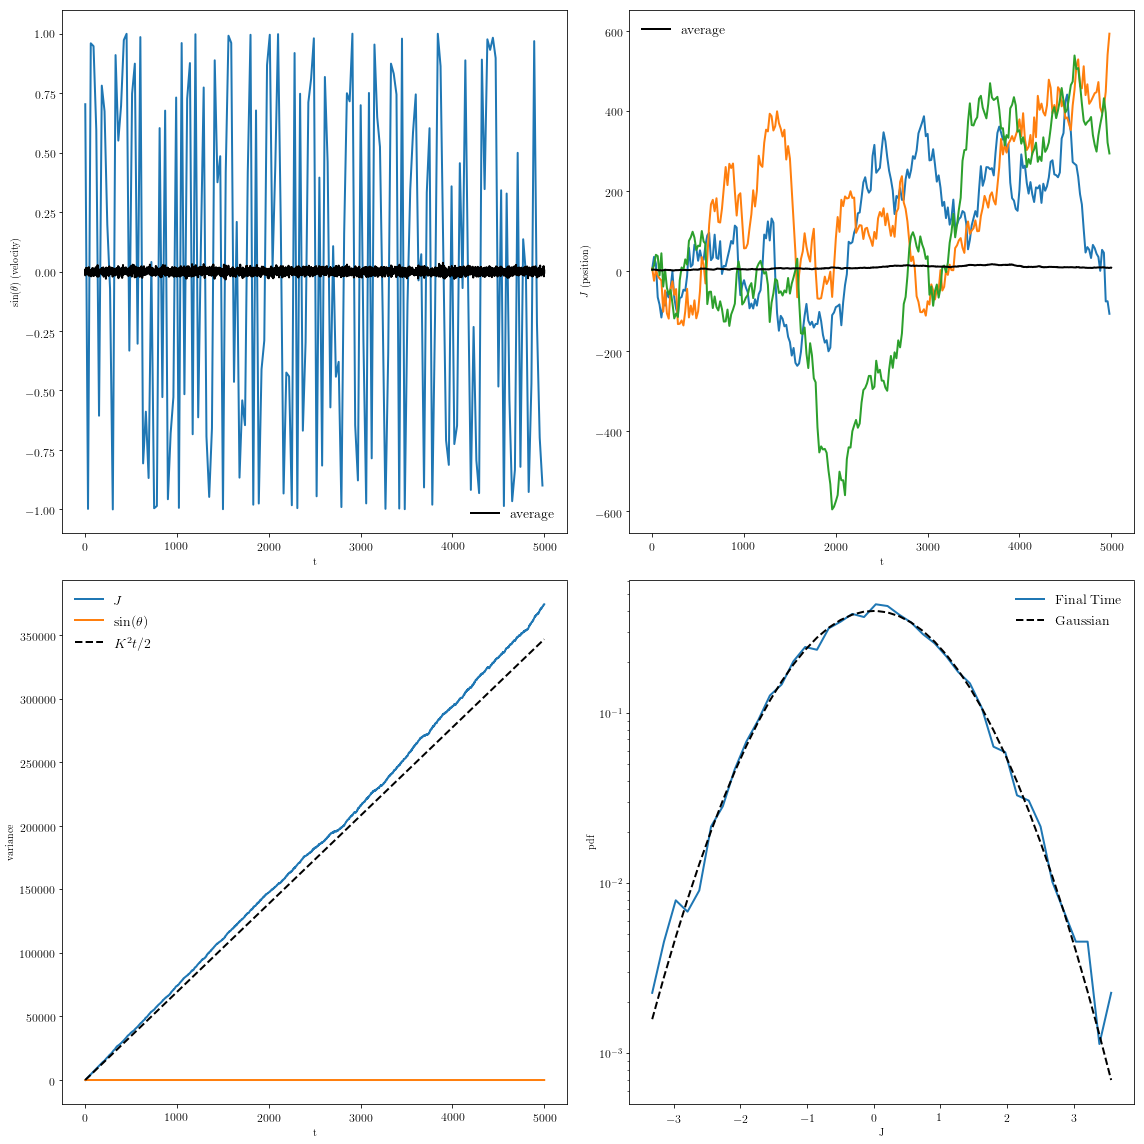

In [4]:
fig,ax=show_map()

### B. In the position of a particle driven by an Ornstein-Uhlenbeck velocity

In [5]:
class Gaussian_Choleski:
        def __init__(self,NT=200,M=5000,c=lambda t : lambda s: 0.5*(s+t-np.abs(s-t)),kappa=1,figheight=figheight):
            self.NT=NT #parameters
            self.M=M #Number of points
            self.kappa=1
            
            self.figheight=figheight
            t=np.arange(1,NT)/NT
            tt=np.meshgrid(t,t)

            self.Time=np.zeros(NT)
            self.Time[1:]=t
            self.gamma=c(tt[0])(tt[1]) ## CORRELATION MATRIX
            
            self.L=np.linalg.cholesky(self.gamma)
            self.Z=np.zeros((NT,M))
            for i in range(self.M):
                Delta=np.random.randn(NT-1,1)*sqrt(kappa)
                X=self.L@Delta
                self.Z[1:,i]=X[:].flatten()

        def show(self,norm=True,figheight=None,every=100):
            if figheight is None:figheight=self.figheight
            Time=self.Time
            Z=self.Z
            kappa=self.kappa
            
            fig,ax=subplots(1,3,figsize=(3*figheight,figheight))

            #SAMPLES
            for i in range(0,self.M,every):
                ax[0].plot(self.Time,self.Z[:,i])
                ax[0].set_xlim(0,1)
                ax[0].set_xlabel('time')
                ax[0].set_ylabel('$W_t$')
                ax[0].grid('on')

            ##AVERAGES
            ia=1
            ax[ia].plot(Time,Z.mean(axis=1),label='$<W_t>$')
            ax[ia].plot(Time,np.sqrt((Z**2).mean(axis=1)),label='$<W_t^2>^{1/2}$')
#            ax[ia].plot(Time,np.sqrt(kappa*Time),'k--',label='$\sqrt{\kappa t}$')
            ax[ia].legend()
            ax[ia].set_xlim(0,1)
            ax[ia].set_ylim(-1,2)
            ax[ia].set_xlabel('time')
            ax[ia].set_ylabel('Averages')
            ax[ia].grid('on')

            ##PDF
            ia=2
            cool=cm.rainbow(np.linspace(0,1,self.NT))
            for i in range(1,self.NT,10):
                if norm:
                    data=(Z[i,:]-Z[i,:].mean())/(Z[i,:].var()**(0.5)) ; XLABEL= '$W_t/ <W_t^2>^{1/2}$'
                else:   data=Z[i,:] ; XLABEL= '$W_t$'
                pdf,cl=np.histogram(data,40,density=True)
                cl=(cl[1:]+cl[:-1])*0.5
                #    print(sum(pdf*(cl[2]-cl[1])))
                ax[ia].plot(cl,pdf,color=cool[i,:])
            ax[ia].plot(cl,np.sqrt(1/(2*pi))*np.exp(-cl**2*0.5),'k--',label='Gaussian')

            ax[ia].legend()
            ax[ia].set_xlabel(XLABEL)
            ax[ia].set_ylabel('pdf')
            ax[ia].grid('on')
            ax[ia].set_yscale('log')

            tight_layout()
            return fig,ax

In [6]:
def show_integratedOU(alpha=1):
    
    bb=Gaussian_Choleski(NT=100,M=1000,c=lambda t : lambda s: np.exp(-alpha*np.abs(s-t)))
    POS=np.zeros((bb.NT,bb.M))
    TAU=bb.Time[2]-bb.Time[1]
    for i in range(bb.NT-1):
        POS[i+1,:]=POS[i,:]+TAU*bb.Z[i,:]

    fig,ax=bb.show(every=100,norm=True)
    ax[1].plot(bb.Time,bb.Time*0+1,'k--',label='$1$'); ax[1].legend();
    
    fig,ax=subplots(1,2,figsize=(2*figheight,figheight),num="Positions $\\tau=%0.3e$" %(1/alpha))

    a=ax[0]
    a.plot(bb.Time, POS[:,::100])
    a.plot(bb.Time, POS.mean(axis=1),'k--',label='average')

    a.set_xlabel("time")
    a.set_ylabel("position")
    a.legend()

    a=ax[1]
    a.plot(bb.Time, POS.var(axis=1),'o',label='variance')
    a.plot(bb.Time, 2*bb.Time/alpha,'k--',label='$2Dt$')
    a.plot(bb.Time[bb.Time<2/alpha], bb.Time[bb.Time<2/alpha]**2,'k-',label='$t^2$')

    a.legend()
    a.set_xlabel("time")
    a.set_ylabel("variance")
    a.set_xscale('linear')
    a.set_yscale('linear')

    return fig,ax

#### Long correlation time $\tau = 1$

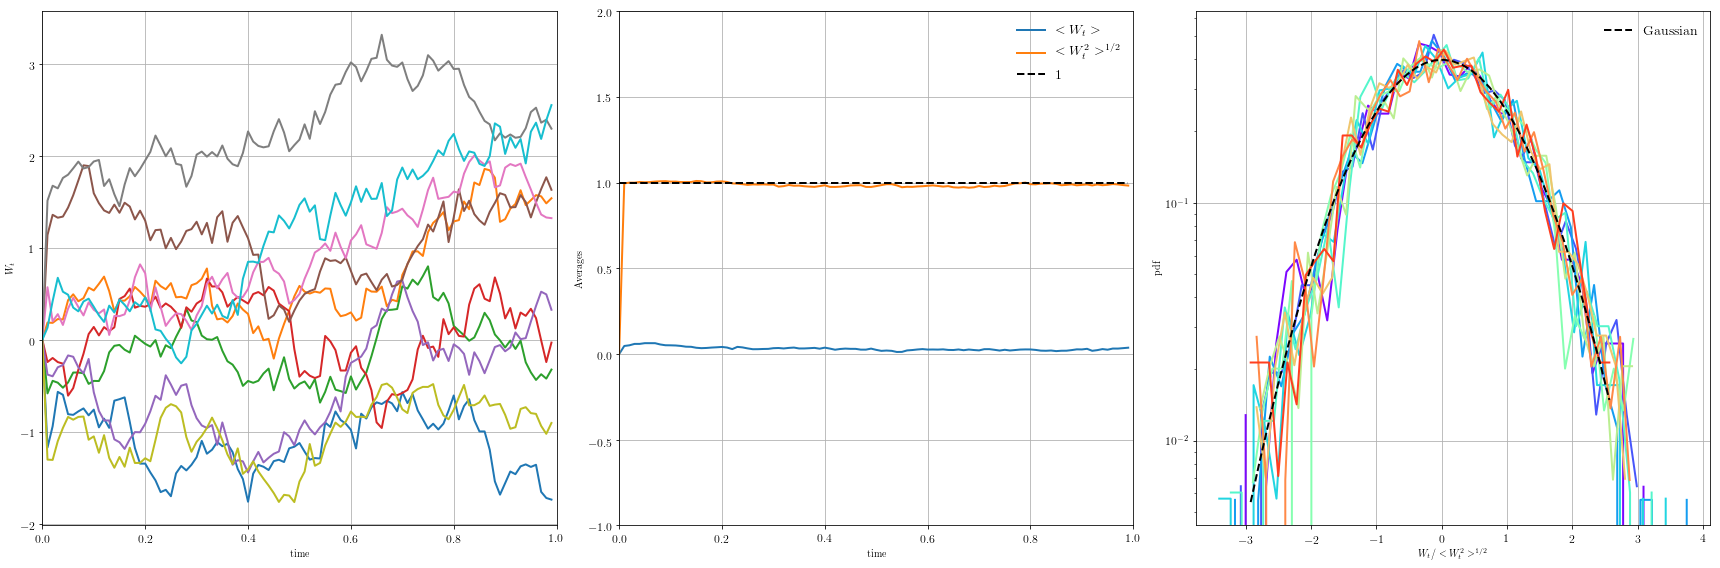

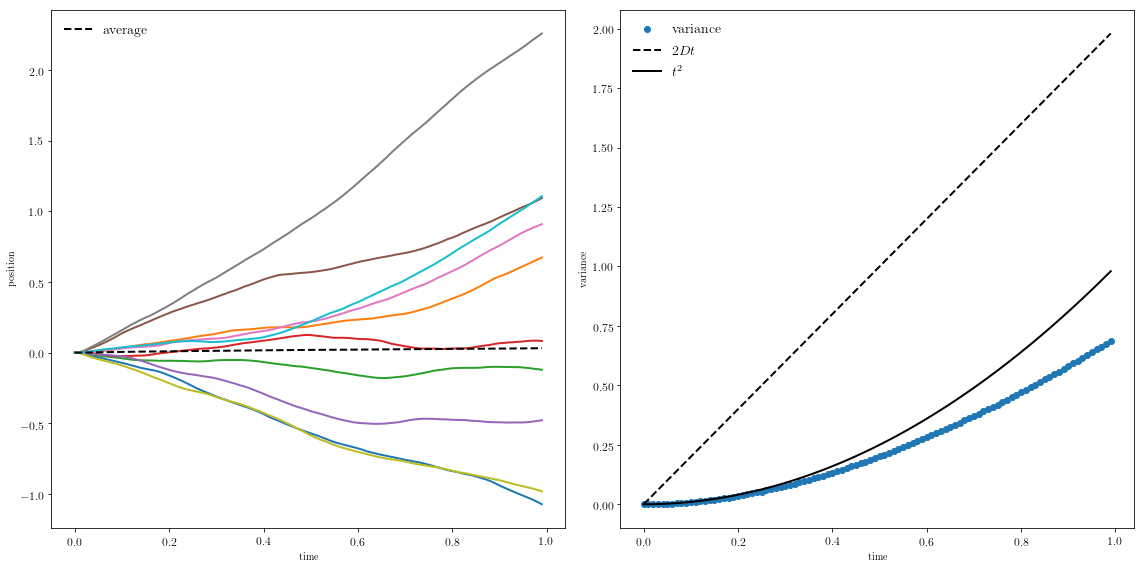

In [7]:
fig,ax=show_integratedOU(alpha=1)

#### Short correlation time $\tau = 0.01$

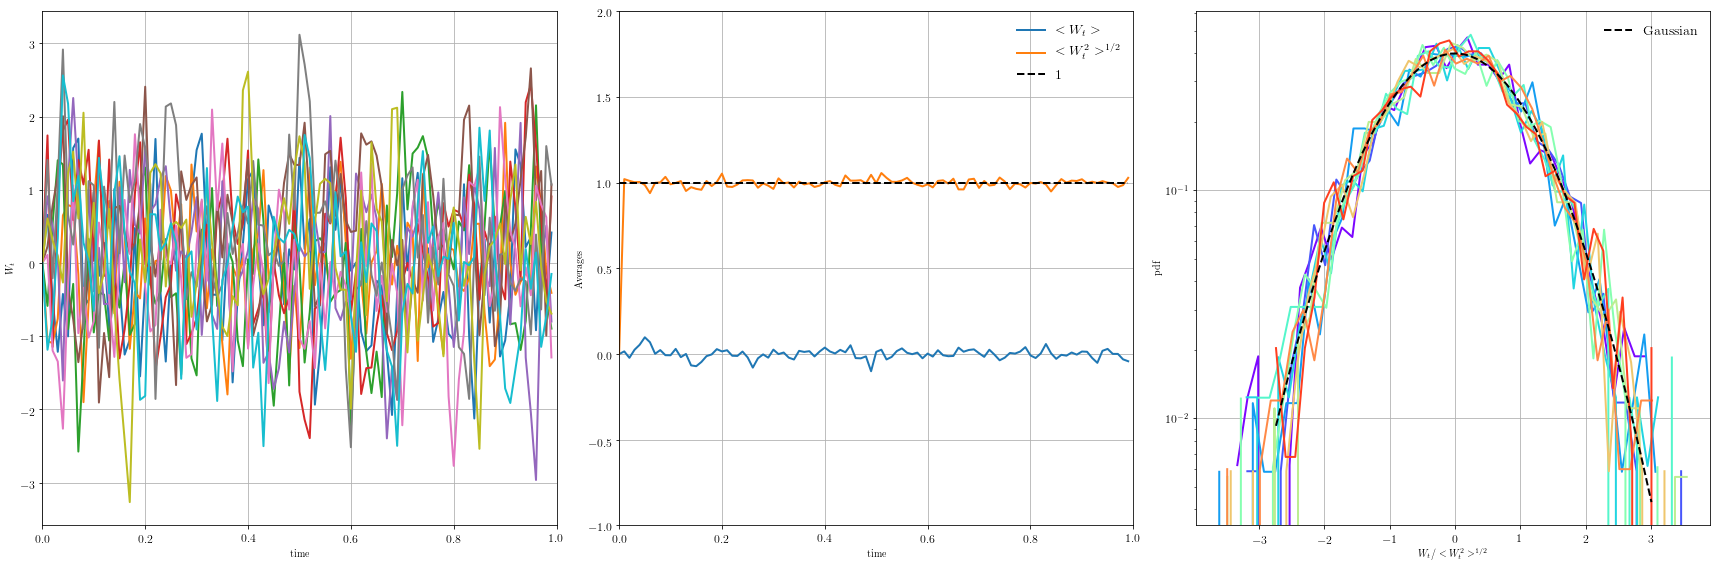

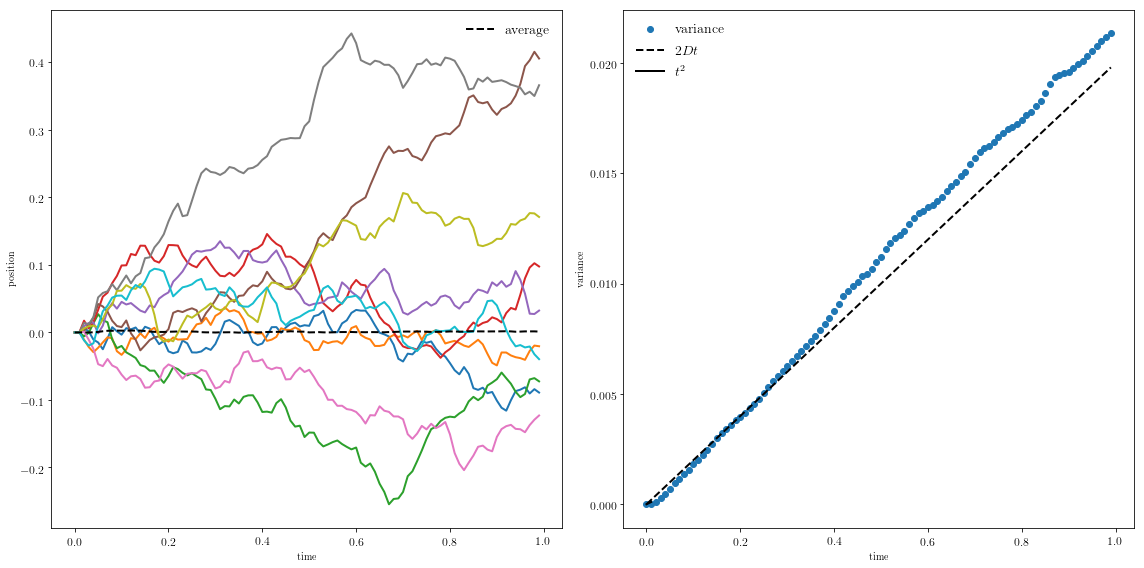

In [8]:
fig,ax=show_integratedOU(alpha=100);

### C.  Inferred from turbulent statistics

An example of the velocity signal observed along a trajectory in a turbulent experiment

Taken from Laurant Chevillard's HDR "une peinture aléatoire de la turbulence", https://tel.archives-ouvertes.fr/tel-01212057/document

quoting Mordant's PHD "Mesure lagrangienne en turbulence : mise en oeuvre et analyse", https://tel.archives-ouvertes.fr/tel-00003926/document


In [9]:
display(HTML("<table><tr>\
            <td><img src='./DATA_TaylorDiffusion/MordantVVL_FromChevillard.png'></td>\
            </tr></table>"));

""


Numerical experiments:

Left: Correlation function of a velocity measured along a trajectory (numerics)

Right : Corresponding mean-squared displacement of a particle 

In [10]:
data=scp.io.loadmat('DATA_TaylorDiffusion/6144_6.0e-02_Disp.mat',squeeze_me=True)
#for i in data.keys(): print(i)
## PLOT mr, mrho
def show_2Dtraj():
    fig,ax=subplots(1,2,figsize=(2.3*figheight,figheight),num='averages')
    Time=data['TimeRange']/data['Tau']['F']

    coeff=data['Tau']['F']/data['Tau']['L']

    a=ax[0]
#a.plot(Time,data['VV1x'],'bx',label="$V_x$")
    a.plot(Time*coeff,data['VV1y'],'b+',label="$V_y$")

    a.set_yscale('log')
    a.set_xscale('linear')
    a.legend(loc='upper left',ncol=1)
    a.set_xlabel("$t/\\tau_L $ ")
    a.set_ylabel("Lagrangian correlation")
    a.set_ylim(1e-5,10)
    a.set_xlim(0.1*coeff,2)
    a.grid()

    a=ax[1]
    a.plot(Time*coeff,data['mr1'],'b.',label="One-point")
#a.plot(Time,data['mrho'],'gx-',label="Mid-point")
#a.plot(Time,data['mr'],'bo',label="Separation")

    xx=np.array([1e1,4e2]); a.plot(xx*coeff,(2+0.5*np.log10(xx)),'k--',label='diffusive : $\\propto \, t^{1/2}$')
    xx=np.array([1e-1,3e0]); a.plot(xx*coeff,(1.6+np.log10(xx)),'k',label='ballistic : $\\propto \, t$')
    xx= data['Tau']['L']/data['Tau']['F']

    a.set_yscale('linear')
    a.set_xscale('log')
    a.legend(loc='upper left',ncol=1)
    a.set_xlabel("$t/\\tau_L $ ")
#    a.set_ylabel("$ \dfrac{1}{2} \\log \\left \\langle \, R^2 \\right \\rangle$")
    a.set_ylabel("$\\frac{1}{2} <\\log R^2 >$")

    a.set_ylim(-0.5,4)
    a.set_xlim(0.1*coeff,2)
    a.grid()
    
    return fig,ax

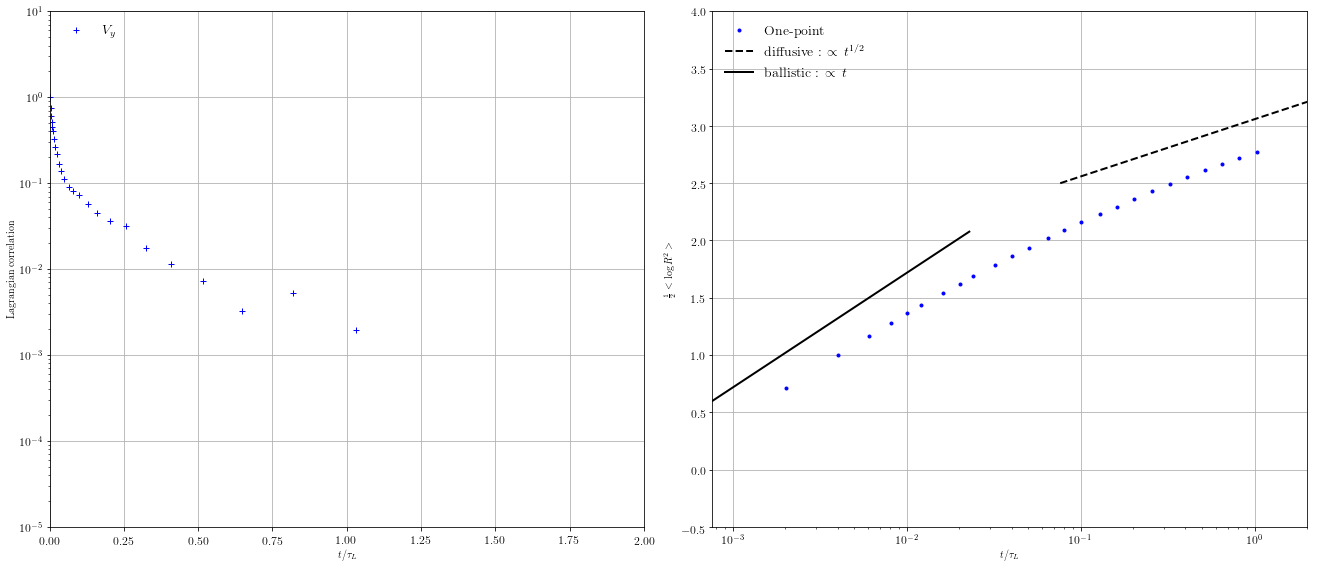

In [11]:
fig,ax=show_2Dtraj()

The low-order statistics of absolute dispersion  look a lot like a time integrated O.U !!!

In [12]:
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }
  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')